<a href="https://colab.research.google.com/github/RLC-S/RLC-S/blob/master/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **Python Packages**

SoundFile is an audio library based on libsndfile, CFFI and NumPy. SoundFile can read and write sound files. 
# https://pysoundfile.readthedocs.io/en/latest/


LibROSA is a python package for **music and audio analysis**. It provides the building blocks necessary to create music information retrieval systems.
# https://librosa.github.io/librosa/

**Data**

https://bhichallenge.med.auth.gr/ICBHI_2017_Challenge


The database consists of a total of 5.5 hours of recordings containing 6898 respiratory cycles, of which 1864 contain crackles, 886 contain wheezes, and 506 contain both crackles and wheezes, in 920 annotated audio samples from 126 subjects.

The cycles were annotated by respiratory experts as including crackles, wheezes, a combination of them, or no adventitious respiratory sounds. The recordings were collected using heterogeneous equipment and their duration ranged from 10s to 90s. The chest locations from which the recordings were acquired is also provided. Noise levels in some respiration cycles is high, which simulate real life conditions.

Each file name is divided into 5 elements, separated with underscores (_).

1. Patient number (101,102,...,226)

2. Recording index

3. Chest location 

      a. Trachea (Tc)

      b. Anterior left (Al)

      c. Anterior right (Ar)

      d. Posterior left (Pl)

      e. Posterior right (Pr)

      f. Lateral left (Ll)

      g. Lateral right (Lr)

4.    Acquisition mode 

     a. sequential/single channel (sc), 

     b. simultaneous/multichannel (mc)

5.    Recording equipment 

     a. AKG C417L Microphone (AKGC417L), 

     b. 3M Littmann Classic II SE Stethoscope (LittC2SE), 

     c. 3M Litmmann 3200 Electronic Stethoscope (Litt3200), 

     d.  WelchAllyn Meditron Master Elite Electronic Stethoscope (Meditron)

The annotation files comprise four columns:

Beginning of respiratory cycle(s)
End of respiratory cycle(s)
Presence/absence of crackles (presence=1, absence=0)
Presence/absence of wheezes (presence=1, absence=0)

In [ ]:
pip install soundfile


In [ ]:
import pandas as pd
import numpy as np
import math
import librosa as lb 
import soundfile as sf 
import os
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


# Data pre-processing


In [ ]:
#get all text files from the DB


audio_and_text_file = '/content/gdrive/My Drive/sample/audio_and_txt_files'
txt_files=[]
for s in os.listdir(path = audio_and_text_file):
   if '.txt' in s:
     txt_files.append(s.split('.')[0])
print(txt_files)

['198_1b5_Al_mc_AKGC417L', '198_1b5_Ar_mc_AKGC417L', '197_1b1_Al_sc_Meditron', '197_1b1_Tc_sc_Meditron', '198_1b5_Ll_mc_AKGC417L', '198_6p1_Lr_mc_AKGC417L', '198_6p1_Al_mc_AKGC417L', '198_1b5_Lr_mc_AKGC417L', '198_1b5_Pr_mc_AKGC417L', '198_1b5_Tc_mc_AKGC417L', '198_6p1_Pl_mc_AKGC417L', '198_6p1_Ar_mc_AKGC417L', '198_6p1_Ll_mc_AKGC417L', '198_1b5_Pl_mc_AKGC417L', '198_6p1_Pr_mc_AKGC417L', '198_6p1_Tc_mc_AKGC417L', '200_2p2_Pl_mc_AKGC417L', '200_2p2_Tc_mc_AKGC417L', '200_2p2_Pr_mc_AKGC417L', '200_2p2_Lr_mc_AKGC417L', '200_2p2_Al_mc_AKGC417L', '199_2b1_Ll_mc_LittC2SE', '200_2p2_Ar_mc_AKGC417L', '199_2b3_Ll_mc_LittC2SE', '200_2p3_Al_mc_AKGC417L', '200_2p4_Pl_mc_AKGC417L', '200_2p3_Ar_mc_AKGC417L', '200_2p3_Lr_mc_AKGC417L', '200_2p4_Lr_mc_AKGC417L', '200_2p3_Pr_mc_AKGC417L', '200_2p4_Al_mc_AKGC417L', '200_2p3_Tc_mc_AKGC417L', '200_2p4_Ar_mc_AKGC417L', '200_2p3_Pl_mc_AKGC417L', '200_2p4_Pr_mc_AKGC417L', '200_3p4_Pl_mc_AKGC417L', '200_3p4_Tc_mc_AKGC417L', '201_1b1_Al_sc_Meditron', '200_3p4_Pr

In [ ]:
def Extract_Data(file_name, root):
    tokens = file_name.split('_')
    recording_info = pd.DataFrame(data = [tokens], columns = ['Patient number', 'Recording index', 'Chest location','Acquisition mode','Recording equipment'])
    recording_annotations = pd.read_csv(os.path.join(root, file_name + '.txt'), names = ['Start', 'End', 'Crackles', 'Wheezes'], delimiter= '\t')
    return (recording_info, recording_annotations)

root = '/content/gdrive/My Drive/sample/audio_and_txt_files'
i_list = []
rec_annotations = []
rec_annotations_dict = {}
for s in txt_files:
    (i,a) = Extract_Data(s, root)
    i_list.append(i)
    rec_annotations.append(a)
    rec_annotations_dict[s] = a


recording_info = pd.concat(i_list, axis = 0)
recording_info.head()   



no_label_list = []
crack_list = []
wheeze_list = []
both_sym_list = []
filename_list = []
for f in txt_files:
    d = rec_annotations_dict[f]
    no_labels = len(d[(d['Crackles'] == 0) & (d['Wheezes'] == 0)].index)
    n_crackles = len(d[(d['Crackles'] == 1) & (d['Wheezes'] == 0)].index)
    n_wheezes = len(d[(d['Crackles'] == 0) & (d['Wheezes'] == 1)].index)
    both_sym = len(d[(d['Crackles'] == 1) & (d['Wheezes'] == 1)].index)
    no_label_list.append(no_labels)
    crack_list.append(n_crackles)
    wheeze_list.append(n_wheezes)
    both_sym_list.append(both_sym)
    filename_list.append(f)




In [ ]:
file_label_df = pd.DataFrame(data = {'filename':filename_list, 'no label':no_label_list, 'crackles only':crack_list, 'wheezes only':wheeze_list, 'crackles and wheezees':both_sym_list})
w_labels = file_label_df[(file_label_df['crackles only'] != 0) | (file_label_df['wheezes only'] != 0) | (file_label_df['crackles and wheezees'] != 0)]
print(file_label_df.sum())
print("*************")
print(w_labels.sum())

filename                 198_1b5_Al_mc_AKGC417L198_1b5_Ar_mc_AKGC417L19...
no label                                                              3696
crackles only                                                         1875
wheezes only                                                           886
crackles and wheezees                                                  506
dtype: object
*************
filename                 198_1b5_Al_mc_AKGC417L198_1b5_Ar_mc_AKGC417L19...
no label                                                              1509
crackles only                                                         1875
wheezes only                                                           886
crackles and wheezees                                                  506
dtype: object


read each file to get the crackles and wheezes information--including the start and end time denoted in seconds

In [ ]:
files_ = []
general_slice_id = 0

for f in txt_files:
    df = pd.read_csv(audio_and_text_file + '/' + f + '.txt', sep='\t', names=['start', 'end', 'crackles', 'wheezes'])
    df['filename'] = f
    
    #get filename features
    f_features = f.split('_')
    df['pId'] = f_features[0]
    df['ac_mode'] = f_features[3]
    df['len_per_slice'] = df['end'].sub(df['start'])

    for _ in df:
      df['slice_id'] = general_slice_id
      general_slice_id += 1
      # print(general_slice_id)
    general_slice_id +=  len(df)



    
    files_.append(df)

# for _ in files_:
#     files_['slice_id'] = general_slice_id
#     general_slice_id += 1
    
files_df = pd.concat(files_)
files_df.reset_index()
files_df.head()



,start,end,crackles,wheezes,filename,pId,ac_mode,len_per_slice,slice_id
0,0.042,2.293,0,1,198_1b5_Al_mc_AKGC417L,198,mc,2.251,7
1,2.293,5.440,0,1,198_1b5_Al_mc_AKGC417L,198,mc,3.147,7
2,5.440,8.976,0,1,198_1b5_Al_mc_AKGC417L,198,mc,3.536,7
3,8.976,12.394,0,1,198_1b5_Al_mc_AKGC417L,198,mc,3.418,7
4,12.394,15.541,0,1,198_1b5_Al_mc_AKGC417L,198,mc,3.147,7


In [ ]:
# files_df.info()
len(files_df)

6963

A plt to the length per slice that we currently have in our dataframe

Text(0, 0.5, 'slice_id')

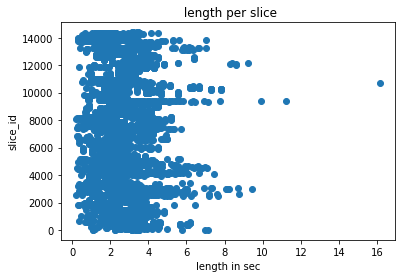

In [ ]:
plt.scatter(list( files_df['len_per_slice']), y=list(files_df['slice_id']))
plt.title(' length per slice')
plt.xlabel('length in sec')
plt.ylabel('slice_id')
# print(list(files_df['len_per_slice']))
# print(len(files_df))

longest cycle:16.163
shortest cycle:0.20000000000000284
Fraction of samples less than 5 seconds:0.966393795777682


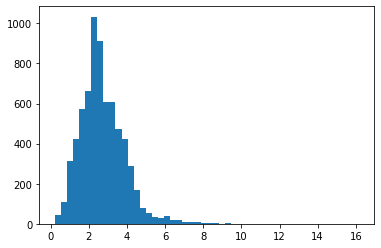

In [ ]:

duration_list = np.array(files_df['len_per_slice'])
plt.hist(files_df['len_per_slice'], bins = 50)
print('longest cycle:{}'.format(max(files_df['len_per_slice'])))
print('shortest cycle:{}'.format(min(files_df['len_per_slice'])))
optimal_length = 5
print('Fraction of samples less than {} seconds:{}'.format(optimal_length, np.sum(duration_list < optimal_length)/len(duration_list)))

**optimal length of time we want to use is 5 sec, almost 97% of the breath/slice is less than 6 sec. now we sure that all audio file  have the same length (this is in preparation for feeding them into the model for training later)**


In [ ]:
#  compute the length of the raw data of the slices
# Audio channels most of the samples have two audio
# channels (meaning stereo) with a few with just the one channel (mono).


def compute_len(samp_rate=22050, time=optimal_length, acquisition_mode=0):

    comp_len = 0
    if acquisition_mode == 1: #ac mode is single channel which means it's 'mono'
        comp_len = samp_rate * time
    else: #stereo
        comp_len = (samp_rate * time) * 2

    return comp_len

# for d in ds:
#     path = os.path.join('/content/gdrive/My Drive/sample/output', d)
#     os.makedirs(path)


In [ ]:
i = 0 #iterator for file naming
def slice_data(start, end, raw_data,  sample_rate):
    max_ind = len(raw_data) 
    start_ind = min(int(start * sample_rate), max_ind)
    end_ind = min(int(end * sample_rate), max_ind)
    return raw_data[start_ind: end_ind]

files_df
for index , row in files_df.iterrows():
    # row = recording_annotations.loc[i]
    start = row['start']
    end = row['end']
    crackles = row['crackles']
    wheezes = row['wheezes']
    filename = row['filename']
    # start = row['start']
    # end = row['end']
    slice_id = row['slice_id']
    print(crackles)
    print(type(crackles))
    
    #check len and force to 6 sec if more than that
    if optimal_length < end - start:
        end = start + optimal_length
    
    aud_loc = audio_and_text_file + '/' + f + '.wav'
    print("idx  ",index)
    if index != 0:
        i=i+1
    else:
        i=0
    # n_filename = filename + '_' + str(i) + '.wav'

    if (crackles != 0 and wheezes != 0 ):
      n_filename = filename + '_' + str(i)  + 'Crackles_Wheezes' + '.wav'
      path = '/content/gdrive/My Drive/sample/output2/Crackles_Wheezes'  + '/' + n_filename

    elif  (crackles != 0 and wheezes == 0 ):
      n_filename = filename + '_' + str(i) +'Crackles'+ '.wav'
      path = '/content/gdrive/My Drive/sample/output2/Crackles'  + '/' + n_filename

    elif  (crackles == 0 and wheezes != 0 ):
      n_filename = filename + '_' + str(i) +'Wheezes'+ '.wav'
      path = '/content/gdrive/My Drive/sample/output2/Wheezes'  + '/' + n_filename
    else:
      n_filename = filename + '_' + str(i)  +'Clear'+  '.wav'
      path = '/content/gdrive/My Drive/sample/output2/Clear'  + '/' + n_filename


    # path = '/content/gdrive/My Drive/sample/output2'  + '/' + n_filename
    
    print('processing ' + n_filename + '...')

    # data, samplingrate = lb.load(aud_loc)
    try:
      # (samplingrate, data) = read_wav_file(path, 22000)
      data, samplingrate = lb.load(aud_loc)
      sliced_data = slice_data(start=start, end=end, raw_data=data, sample_rate=samplingrate)
    except :
       continue

    # padded_data = split_and_pad(sliced_data, 5, 22000)
    
    #pad audio if < forced_max_len
    a_len = compute_len(samp_rate=samplingrate, acquisition_mode=row['ac_mode']=='sc')
    padded_data = lb.util.pad_center(sliced_data, a_len)

    sf.write(file=path, data=padded_data, samplerate=samplingrate)

Streaming output truncated to the last 5000 lines.
<class 'int'>
idx   4
processing 110_1p1_Lr_sc_Meditron_4Crackles.wav...
1
<class 'int'>
idx   5
processing 110_1p1_Lr_sc_Meditron_5Crackles.wav...
1
<class 'int'>
idx   6
processing 110_1p1_Lr_sc_Meditron_6Crackles.wav...
0
<class 'int'>
idx   0
processing 110_1p1_Pr_sc_Meditron_0Clear.wav...
0
<class 'int'>
idx   1
processing 110_1p1_Pr_sc_Meditron_1Clear.wav...
0
<class 'int'>
idx   2
processing 110_1p1_Pr_sc_Meditron_2Clear.wav...
0
<class 'int'>
idx   3
processing 110_1p1_Pr_sc_Meditron_3Clear.wav...
0
<class 'int'>
idx   4
processing 110_1p1_Pr_sc_Meditron_4Clear.wav...
0
<class 'int'>
idx   5
processing 110_1p1_Pr_sc_Meditron_5Clear.wav...
0
<class 'int'>
idx   6
processing 110_1p1_Pr_sc_Meditron_6Clear.wav...
0
<class 'int'>
idx   7
processing 110_1p1_Pr_sc_Meditron_7Clear.wav...
0
<class 'int'>
idx   8
processing 110_1p1_Pr_sc_Meditron_8Clear.wav...
0
<class 'int'>
idx   9
processing 110_1p1_Pr_sc_Meditron_9Clear.wav...
0
<cla

**Split folders with files into train, validation and test (dataset) folders.**

https://pypi.org/project/split-folders/


**Training set**: a set of examples used for learning: to fit the parameters of the classifier In the Multilayer Perceptron (MLP) case, we would use the training set to find the “optimal” weights with the back-prop rule


**Validation set**: a set of examples used to tune the parameters of a classifier In the MLP case, we would use the validation set to find the “optimal” number of hidden units or determine a stopping point for the back-propagation algorithm

**Test set**: a set of examples used only to assess the performance of a fully-trained classifier In the MLP case, we would use the test to estimate the error rate after we have chosen the final model (MLP size and actual weights) After assessing the final model on the test set, YOU MUST NOT tune the model any further!

Why separate test and validation sets? The error rate estimate of the final model on validation data will be biased (smaller than the true error rate) since the validation set is used to select the final model After assessing the final model on the test set, YOU MUST NOT tune the model any further!



In [ ]:
!pip install split_folders


In [ ]:
import split_folders
import os

# os.makedirs('output')
# os.makedirs('output/train')
# os.makedirs('output/val')

input_folder ='/content/gdrive/My Drive/sample/output2/'

split_folders.ratio(input_folder, output="output", seed=1337,ratio=(0.75, 0.25))

Streaming output truncated to the last 5000 lines.
Copying files: 1965 files [08:59,  4.89 files/s]
Copying files: 1966 files [08:59,  4.19 files/s]
Copying files: 1967 files [08:59,  4.72 files/s]
Copying files: 1968 files [08:59,  4.39 files/s]
Copying files: 1969 files [09:00,  4.91 files/s]
Copying files: 1970 files [09:00,  5.14 files/s]
Copying files: 1971 files [09:00,  4.16 files/s]
Copying files: 1972 files [09:00,  4.53 files/s]
Copying files: 1973 files [09:00,  4.41 files/s]
Copying files: 1974 files [09:01,  4.64 files/s]
Copying files: 1975 files [09:01,  5.12 files/s]
Copying files: 1976 files [09:01,  5.39 files/s]
Copying files: 1977 files [09:01,  5.79 files/s]
Copying files: 1978 files [09:01,  6.21 files/s]
Copying files: 1979 files [09:01,  6.10 files/s]
Copying files: 1980 files [09:02,  6.36 files/s]
Copying files: 1981 files [09:02,  6.80 files/s]
Copying files: 1982 files [09:02,  5.94 files/s]
Copying files: 1983 files [09:02,  5.96 files/s]
Copying files: 198

In [ ]:
# ptint(os.path.getsize=('/content/gdrive/My Drive/sample/output/'))

# import os
# os.path.getsize('C:\\Python27\\Lib\\genericpath.py')
# Or use os.stat(path).st_size

# import os
# os.stat('/content/gdrive/My Drive/sample/output/').st_size 

4096

 # Spectrogram images

In [ ]:
from librosa.display import specshow

import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

import pandas as pd


#create images using librosa spectogram
def convert_to_spec_image(file_loc, filename,category,is_train=True):


    #Load an audio file as a floating point time series.
    # y:  audio time series , sr:  sampling rate of `y`

    train_ = 'train/'
    val_ = 'val/'
    
    loc = file_loc + train_ + category + '/' + filename
    if is_train == False:
        loc = file_loc + val_ + category + '/' + filename

    y, sr = lb.load(file_loc)

    #Plot signal in
    plt.figure(figsize=(10,3))

    #"Short-time Fourier transform
    src_stft = lb.stft(y)

    #Convert an amplitude spectrogram to dB-scaled spectrogram
    # todo 
    src_db = lb.amplitude_to_db(abs(src_stft))
    
    #Display a spectrogram
    specshow(src_db, sr=sr, x_axis='time', y_axis='hz')  
    plt.ylim(0, 5000)
 
    filename_img = filename.split('.wav')[0]
    
    # save_loc = '/content/gdrive/My Drive/sample/output_split' + '/' + filename_img + '.png'

    save_loc = '/content/gdrive/My Drive/sample/output4/' + train_ + category + '/' + filename_img + '.png'
    if is_train == False:
        save_loc = '/content/gdrive/My Drive/sample/output4/' + val_ + category + '/' + filename_img + '.png'
 
    plt.savefig(save_loc)
    plt.close()


categories = ["Crackles_Wheezes","Crackles","Wheezes","Clear"]
for cat in categories:
        print('-' * 100)
        print('working on ' + cat + '...')
        print('-' * 100)


        files = [f for f in listdir('/content/gdrive/My Drive/sample/output3')]
        files = [f for f in listdir('/content/gdrive/My Drive/sample/output3' + '/'+ "train" + '/' + cat + '/')]
        for f in files:
           filename_img = f.split('.wav')[0]
           save_loc = '/content/gdrive/My Drive/sample/output4'+ '/' + "train" + '/' + cat + '/'+ filename_img + '.png'
           if (not os.path.exists(save_loc) ):
             print  ("convert_to_spec_image to" + f + "...." ) 
             convert_to_spec_image('/content/gdrive/My Drive/sample/output3' + '/' + "train" + '/' + cat +  '/' + f, f,cat)
             print  ("finsh to " + f  ) 
           else:
             print  ("Already exist" + f + "...." ) 



files = [f for f in listdir('/content/gdrive/My Drive/sample/output')]
for f in files:
  filename_img = f.split('.wav')[0]
  save_loc = '/content/gdrive/My Drive/sample/output_split' + '/' + filename_img + '.png'
  if (not os.path.exists(save_loc) ):
    print  ("convert_to_spec_image to" + f + "...." ) 
    convert_to_spec_image('/content/gdrive/My Drive/sample/output/' + f, f)
    print  ("finsh to " + f  ) 
  else:
    print  ("Already exist" + f + "...." ) 



Streaming output truncated to the last 5000 lines.
Already exist156_2b3_Pl_mc_AKGC417L_1Crackles_Wheezes.wav....
Already exist156_2b3_Pl_mc_AKGC417L_3Crackles_Wheezes.wav....
Already exist156_2b3_Pl_mc_AKGC417L_5Crackles_Wheezes.wav....
Already exist156_5b3_Ar_mc_AKGC417L_2Crackles_Wheezes.wav....
Already exist156_5b3_Ar_mc_AKGC417L_5Crackles_Wheezes.wav....
Already exist156_5b3_Ar_mc_AKGC417L_6Crackles_Wheezes.wav....
Already exist156_5b3_Ar_mc_AKGC417L_7Crackles_Wheezes.wav....
Already exist156_5b3_Ar_mc_AKGC417L_8Crackles_Wheezes.wav....
Already exist156_5b3_Lr_mc_AKGC417L_1Crackles_Wheezes.wav....
Already exist156_5b3_Lr_mc_AKGC417L_2Crackles_Wheezes.wav....
Already exist156_5b3_Lr_mc_AKGC417L_4Crackles_Wheezes.wav....
Already exist156_5b3_Lr_mc_AKGC417L_5Crackles_Wheezes.wav....
Already exist156_5b3_Lr_mc_AKGC417L_6Crackles_Wheezes.wav....
Already exist156_5b3_Lr_mc_AKGC417L_8Crackles_Wheezes.wav....
Already exist156_8b3_Pl_mc_AKGC417L_2Crackles_Wheezes.wav....
Already exist156_8b

# MelSpectrogram

In [ ]:
import librosa.display
from librosa.display import specshow

import matplotlib.pyplot as plt

import os
from os import listdir
from os.path import isfile, join

import pandas as pd

#create images using librosa spectogram
def convert_to_melspec_image(file_loc, filename,category,is_train=False):
    ''' 
        Converts audio file to spec image
        Input file includes path
        Saves the file to a png image in the save_directory
    '''

    #Load an audio file as a floating point time series.
    # y:  audio time series , sr:  sampling rate of `y`

    train_ = 'train/'
    val_ = 'val/'
    
    loc = file_loc + train_ + category + '/' + filename
    if is_train == False:
        loc = file_loc + val_ + category + '/' + filename

    y, sr = lb.load(loc)
    mel_spect = lb.feature.melspectrogram(y=y, sr=sr,  n_mels=128,fmax=8000)
    mel_spect_dB = lb.power_to_db(mel_spect, ref=np.max)
    lb.display.specshow(mel_spect_dB, y_axis='mel', x_axis='time', sr=sr, fmax=8000);
 
    # #Plot signal in
    # plt.figure(figsize=(10,3))

    # #"Short-time Fourier transform
    # src_stft = lb.stft(y)

    # #Convert an amplitude spectrogram to dB-scaled spectrogram
    # # todo 
    # src_db = lb.amplitude_to_db(abs(src_stft))
    
    # #Display a spectrogram
    # specshow(src_db, sr=sr, x_axis='time', y_axis='hz')  
    # plt.ylim(0, 5000)
 
    filename_img = filename.split('.wav')[0]
    

    save_loc = '/content/gdrive/My Drive/sample/output5/' + train_ + category + '/' +"mel-"+ filename_img + '.png'
    if is_train == False:
        save_loc = '/content/gdrive/My Drive/sample/output5/' + val_ + category + '/' +"mel-"+ filename_img + '.png'
 
    plt.savefig(save_loc)
    plt.close()


categories = ["Crackles_Wheezes","Crackles","Wheezes","Clear"]
for cat in categories:
        print('-' * 100)
        print('working on ' + cat + '...')
        print('-' * 100)


        #########change to val
        files = [f for f in listdir('/content/gdrive/My Drive/sample/output3' + '/'+ "val" + '/' + cat + '/')]
        for f in files:
           filename_img = f.split('.wav')[0]
           save_loc = '/content/gdrive/My Drive/sample/output5'+ '/' + "val" + '/' + cat + '/' +"mel-"+ filename_img + '.png'
           if (not os.path.exists(save_loc) ):
             print  ("convert_to_melspec_image to" + f + "...." ) 
             convert_to_melspec_image('/content/gdrive/My Drive/sample/output3/' , f,cat)
             print  ("finsh to " + f  ) 
           else:
             print  ("Already exist" + f + "...." ) 

----------------------------------------------------------------------------------------------------
working on Crackles_Wheezes...
----------------------------------------------------------------------------------------------------
Already exist201_1b1_Al_sc_Meditron_3Crackles_Wheezes.wav....
Already exist201_1b1_Al_sc_Meditron_4Crackles_Wheezes.wav....
Already exist201_1b2_Al_sc_Meditron_1Crackles_Wheezes.wav....
Already exist201_1b2_Al_sc_Meditron_2Crackles_Wheezes.wav....
Already exist203_1p2_Lr_mc_AKGC417L_1Crackles_Wheezes.wav....
Already exist203_1p2_Lr_mc_AKGC417L_6Crackles_Wheezes.wav....
Already exist203_1p4_Pl_mc_AKGC417L_6Crackles_Wheezes.wav....
Already exist203_1p3_Ar_mc_AKGC417L_3Crackles_Wheezes.wav....
Already exist203_1p3_Pr_mc_AKGC417L_5Crackles_Wheezes.wav....
Already exist211_1p2_Pl_mc_AKGC417L_5Crackles_Wheezes.wav....
Already exist218_1b1_Al_sc_Meditron_14Crackles_Wheezes.wav....
Already exist218_1b1_Ar_sc_Meditron_0Crackles_Wheezes.wav....
Already exist218_1b1_A


normal breathing
<!-- ![normal breathing](https://drive.google.com/uc?id=1Lh24kac5ZuIeHm9oonEMBl3J4BAkcTlg) -->


crucker
<!-- ![alt text](https://drive.google.com/uc?id=1CmSrpVaBkbJsBZijxR1cEt9V1PPZUON7) -->

In [ ]:
import os
import random
from shutil import copyfile

def img_train_test_split(img_source_dir, train_size):
    """
    Randomly splits images over a train and validation folder, while preserving the folder structure
    
    Parameters
    ----------
    img_source_dir : string
        Path to the folder with the images to be split. Can be absolute or relative path   
        
    train_size : float
        Proportion of the original images that need to be copied in the subdirectory in the train folder
    """    
    if not (isinstance(img_source_dir, str)):
        raise AttributeError('img_source_dir must be a string')
        
    if not os.path.exists(img_source_dir):
        raise OSError('img_source_dir does not exist')
        
    if not (isinstance(train_size, float)):
        raise AttributeError('train_size must be a float')
        
    # Set up empty folder structure if not exists
    if not os.path.exists('data'):
        os.makedirs('data')
    else:
        if not os.path.exists('data/train'):
            os.makedirs('data/train')
        if not os.path.exists('data/validation'):
            os.makedirs('data/validation')
            
    # Get the subdirectories in the main image folder


    subdirs = [subdir for subdir in os.listdir(img_source_dir) if os.path.isdir(os.path.join(img_source_dir, subdir))]
    # subdirs = [subdir for subdir in os.listdir(img_source_dir)]
   

    for subdir in subdirs:
        subdir_fullpath = os.path.join(img_source_dir, subdir)
        if len(os.listdir(subdir_fullpath)) == 0:
            print(subdir_fullpath + ' is empty')
            break

        train_subdir = os.path.join('data/train', subdir)
        validation_subdir = os.path.join('data/validation', subdir)

        # Create subdirectories in train and validation folders
        if not os.path.exists(train_subdir):
            os.makedirs(train_subdir)

        if not os.path.exists(validation_subdir):
            os.makedirs(validation_subdir)

        train_counter = 0
        validation_counter = 0
        

        # Randomly assign an image to train or validation folder
        for filename in os.listdir(subdir_fullpath):
            if filename.endswith(".jpg") or filename.endswith(".png"): 
                fileparts = filename.split('.')

                if random.uniform(0, 1) <= train_size:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(train_subdir, str(train_counter) + '.' + fileparts[1]))
                    train_counter += 1
                else:
                    copyfile(os.path.join(subdir_fullpath, filename), os.path.join(validation_subdir, str(validation_counter) + '.' + fileparts[1]))
                    validation_counter += 1
                    
        print('Copied ' + str(train_counter) + ' images to data/train/' + subdir)
        print('Copied ' + str(validation_counter) + ' images to data/validation/' + subdir)

In [ ]:
# img_train_test_split('/content/gdrive/My Drive/sample/spec',0.75)

Copied 1371 images to data/train/output_split
Copied 454 images to data/validation/output_split


# Tranning - VGG16 

use the Spectrogram images created from audio to feed to a convolutional 2d model, using VGG16.

VGG16 model, with weights pre-trained on ImageNet. 
The default input size for this model is 224x224.






In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import metrics

from sklearn.utils import class_weight
from collections import Counter

import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

import pandas as pd

In [ ]:
train_loc ='/content/gdrive/My Drive/sample/output6/trainV2'
test_loc ='/content/gdrive/My Drive/sample/output6/valV2'


traindata = ImageDataGenerator().flow_from_directory(directory=train_loc, target_size=(224,224))
testdata =  ImageDataGenerator().flow_from_directory(directory=test_loc, target_size=(224,224))

Found 5221 images belonging to 2 classes.
Found 1742 images belonging to 2 classes.


In [ ]:
# counter = Counter(testdata.classes)   
# # str(traindata.classes)
# counter

In [ ]:
# model = Sequential()
# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [ ]:
vgg16 = VGG16(weights='imagenet')
vgg16.summary()

 #given some input tensor(s) and output tensor(s)
 #This model will include all layers required in the computation

x  = vgg16.get_layer('fc2').output

# I use a 2 unit dense layer in the end with softmax activation as I have 4 
# classes to predict from in the end
prediction = Dense(4, activation='softmax', name='predictions')(x)

model = Model(inputs=vgg16.input, outputs=prediction)


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# compile the model

In [ ]:
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[-20:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name) 


# Adam optimiser to reach to the global minima while training out model. 
# If I am stuck in local minima while training then the adam optimiser will 
# help us to get out of local minima and reach global minima.


Layer 'block1_pool' is trainable
Layer 'block2_conv1' is trainable
Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten' is trainable
Layer 'fc1' is trainable
Layer 'fc2' is trainable
Layer 'predictions' is trainable


In [ ]:
opt = Adam(lr=0.000001)
model.compile(optimizer=opt, loss=categorical_crossentropy, 
              metrics=['accuracy', 'mae'])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
for layer in model.layers:
    layer.trainable = False

for layer in model.layers[-17:]:
    layer.trainable = True
    print("Layer '%s' is trainable" % layer.name) 

Layer 'block1_pool' is trainable
Layer 'block2_conv1' is trainable
Layer 'block2_conv2' is trainable
Layer 'block2_pool' is trainable
Layer 'block3_conv1' is trainable
Layer 'block3_conv2' is trainable
Layer 'block3_conv3' is trainable
Layer 'block3_pool' is trainable
Layer 'block4_conv1' is trainable
Layer 'block4_conv2' is trainable
Layer 'block4_conv3' is trainable
Layer 'block4_pool' is trainable
Layer 'block5_conv1' is trainable
Layer 'block5_conv2' is trainable
Layer 'block5_conv3' is trainable
Layer 'block5_pool' is trainable
Layer 'flatten' is trainable
Layer 'fc1' is trainable
Layer 'fc2' is trainable
Layer 'predictions' is trainable


In [ ]:
# opt = Adam(lr=0.000001)
# model.compile(optimizer=opt, loss=categorical_crossentropy, 
#               metrics=['accuracy', 'mae'])
# model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:

#  Save the model by monitoring a specific parameter of the model. In this case I am monitoring 
#  validation accuracy by passing val_acc to ModelCheckpoint
checkpoint = ModelCheckpoint("vgg16_base_res.h5", monitor='val_accuracy', verbose=1, 
                             save_best_only=True, save_weights_only=False, mode='auto')



#  monitoring validation accuracy by passing val_acc to EarlyStopping. set patience 
#  to 20 which means that the model will stop to train if it doesn’t see any rise
# in validation accuracy in 20 epochs.
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=20, verbose=1, mode='auto')

counter = Counter(traindata.classes)                       
max_val = float(max(counter.values()))   
print(max_val)
class_weights = {class_id : max_val/num_images for class_id, num_images in counter.items()}
class_weights

2772.0


{0: 1.0, 1: 1.9715504978662874, 2: 7.313984168865435, 3: 4.174698795180723}

#start training

In [ ]:
hist = model.fit(traindata, steps_per_epoch=traindata.samples//traindata.batch_size, validation_data=testdata, 
                 class_weight=class_weights, validation_steps=testdata.samples//testdata.batch_size, 
                 epochs=110,callbacks=[checkpoint,early])

Epoch 1/110
163/163 [==============================] - ETA: 0s - loss: 2.9402 - accuracy: 0.3280 - mae: 0.3640
Epoch 00001: val_accuracy improved from -inf to 0.30613, saving model to vgg16_base_res.h5
163/163 [==============================] - 1059s 6s/step - loss: 2.9402 - accuracy: 0.3280 - mae: 0.3640 - val_loss: 1.3355 - val_accuracy: 0.3061 - val_mae: 0.3604
Epoch 2/110
163/163 [==============================] - ETA: 0s - loss: 2.8341 - accuracy: 0.3608 - mae: 0.3568

#Evaluation

In [ ]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.title('Accuracy')
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.legend()
plt.title('Loss')


In [ ]:
# plt.plot(hist.history['loss'], label='train')
# plt.plot(hist.history['val_loss'], label='val')
# plt.title('VGG16: Loss and Validation Loss (0.000001 = Adam LR)')
# plt.legend();
# plt.show()

# plt.plot(hist.history['accuracy'], label='train')
# plt.plot(hist.history['val_accuracy'], label='val')
# plt.title('VGG16: Accuracy and Validation Accuracy (0.000001 = Adam LR)')
# plt.legend();
# plt.show()

# plt.plot(hist.history['mae'], label='train')
# plt.plot(hist.history['val_mae'], label='val')
# plt.title('VGG16: MAE and Validation MAE (0.000001 = Adam LR)')
# plt.legend();
# plt.show()





#  predictions on the trained model

[[0.00662707 0.04950039 0.94071853 0.00315396]]


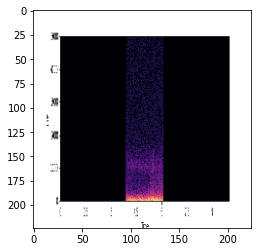

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

img = image.load_img("/content/gdrive/My Drive/sample/output4/val/Crackles_Wheezes/156_5b3_Lr_mc_AKGC417L_7Crackles_Wheezes.png",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)

saved_model = load_model("/content/gdrive/My Drive/sample/vgg16_base_res.h5")
output = saved_model.predict(img)
print(output)


# Test the model

Here we will review the accuracy of the model on both the training and test data sets.



In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
saved_model = load_model("/content/vgg16_base_res.h5")


In [ ]:
train_loc ='/content/gdrive/My Drive/sample/output4/train'
test_loc ='/content/gdrive/My Drive/sample/output4/val'


traindata = ImageDataGenerator().flow_from_directory(directory=train_loc, target_size=(224,224))
testdata =  ImageDataGenerator().flow_from_directory(directory=test_loc, target_size=(224,224))



# test_steps = np.ceil(testdata.samples/testdata.batch_size)
# true_classes = testdata.classes
# saved_model = load_model("/content/gdrive/My Drive/sample/vgg16_base_res.h5")

.
# preds = saved_model.predict(testdata) # label scores 
# # predictions = model.predict_generator(generator = testdata, steps = valid_steps)
# auc = roc_auc_score(y_true = true_classes, y_score = preds)
# print('auc score from generator', auc)
# testdata



Y_pred = saved_model.predict_generator(testdata, testdata.samples//testdata.batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ["Clear","Crackles","Crackles_Wheezes","Wheezes"]
print(classification_report(testdata.classes, y_pred, target_names=target_names))

preds = saved_model.predict(testdata) # label scores 

classpreds = np.argmax(preds, axis=1) # predicted classes 

y_testclass = np.argmax(testdata, axis=1) # true classes

n_classes=4 # number of classes

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], preds[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

c_names = ["Crackles_Wheezes","Crackles","Wheezes","Clear"]

# Plot ROC curves
fig, ax = plt.subplots(figsize=(16, 10))
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve for Each Class')
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], linewidth=3, label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], c_names[i]))
ax.legend(loc="best", fontsize='x-large')
ax.grid(alpha=.4)
sns.despine()
plt.show()

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[924   0   0   0]
 [469   0   0   0]
 [127   0   0   0]
 [222   0   0   0]]
Classification Report
                  precision    recall  f1-score   support

           Clear       0.53      1.00      0.69       924
        Crackles       0.00      0.00      0.00       469
Crackles_Wheezes       0.00      0.00      0.00       127
         Wheezes       0.00      0.00      0.00       222

        accuracy                           0.53      1742
       macro avg       0.13      0.25      0.17      1742
    weighted avg       0.28      0.53      0.37      1742



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
